<a href="https://colab.research.google.com/github/vaibhavzine25/Amazon-Clone/blob/main/EmployeeSalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Libraries and Upload Your Data

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from google.colab import files # Use this to upload files in Colab

# This cell will prompt you to upload the 'adult 3.csv' file.
print("Please upload your 'adult 3.csv' file.")
uploaded = files.upload()
file_name = 'adult 3.csv'
print(f"\n'{file_name}' uploaded successfully!")

Please upload your 'adult 3.csv' file.


Saving adult 3.csv to adult 3.csv

'adult 3.csv' uploaded successfully!


Step 2: Load and Explore the Data

In [2]:
# Define column names as they are not in the CSV file
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'gender', 'capital-gain',
    'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Load the dataset, handling potential issues
df = pd.read_csv(file_name, header=None, names=column_names,
                 sep=',\s*', engine='python', na_values='?')

print("\n--- Initial Data Exploration: First 5 Rows ---")
print(df.head())


--- Initial Data Exploration: First 5 Rows ---
   age  workclass  fnlwgt     education    education-num      marital-status  \
0  age  workclass  fnlwgt     education  educational-num      marital-status   
1   25    Private  226802          11th                7       Never-married   
2   38    Private   89814       HS-grad                9  Married-civ-spouse   
3   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
4   44    Private  160323  Some-college               10  Married-civ-spouse   

          occupation  relationship   race  gender  capital-gain  capital-loss  \
0         occupation  relationship   race  gender  capital-gain  capital-loss   
1  Machine-op-inspct     Own-child  Black    Male             0             0   
2    Farming-fishing       Husband  White    Male             0             0   
3    Protective-serv       Husband  White    Male             0             0   
4  Machine-op-inspct       Husband  Black    Male          7688   

Step 3: Analyze and Clean the Data

In [3]:
print("\n--- Analyzing Categorical Features: Occupation Counts (Before Cleaning) ---")
# dropna=False shows the count of NaN (missing) values
print(df['occupation'].value_counts(dropna=False))

print("\n--- Data Preprocessing: Handling Missing Values ---")
# Replace missing values in categorical columns with the mode
for col in ['workclass', 'occupation', 'native-country']:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)
    print(f"Missing values in '{col}' replaced with mode ('{mode}').")

print("\n--- Verifying Missing values count after preprocessing: ---")
print(df.isna().sum())


--- Analyzing Categorical Features: Occupation Counts (Before Cleaning) ---
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
NaN                  2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
occupation              1
Name: count, dtype: int64

--- Data Preprocessing: Handling Missing Values ---
Missing values in 'workclass' replaced with mode ('Private').
Missing values in 'occupation' replaced with mode ('Prof-specialty').
Missing values in 'native-country' replaced with mode ('United-States').

--- Verifying Missing values count after preprocessing: ---
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationshi

/tmp/ipython-input-3-1787251190.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode, inplace=True)


Step 4: Set Up the Model Pipeline

In [4]:
# Separate features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']

# Identify numerical and categorical features for the pipeline
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the model
model = LogisticRegression(max_iter=1000)

# Create the full pipeline
clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

print("Model pipeline created successfully.")

Model pipeline created successfully.


Step 5: Split Data and Train the Model

In [5]:
# Check the distribution of the target variable before splitting
print("\nDistribution of target variable 'income':")
print(y.value_counts())

# Split data into training and testing sets (without stratify to avoid errors)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
print("\nTraining the model...")
clf_pipeline.fit(X_train, y_train)
print("Model training complete.")



Distribution of target variable 'income':
income
<=50K     37155
>50K      11687
income        1
Name: count, dtype: int64

Training the model...
Model training complete.


Step 6: Evaluate the Model and View Results



--- Model Performance: Classification Report ---
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      7440
        >50K       0.76      0.65      0.70      2329

    accuracy                           0.87      9769
   macro avg       0.83      0.79      0.81      9769
weighted avg       0.86      0.87      0.86      9769


--- Model Performance: Confusion Matrix ---


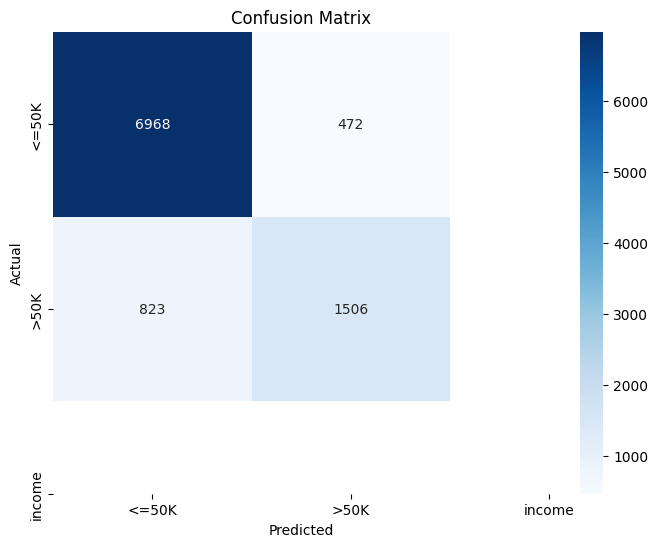

In [6]:
# Make predictions on the test data
y_pred = clf_pipeline.predict(X_test)

# --- Displaying Results ---

# 1. Model Performance - Classification Report
print("\n--- Model Performance: Classification Report ---")
report = classification_report(y_test, y_pred)
print(report)

# 2. Model Performance - Confusion Matrix
print("\n--- Model Performance: Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)

# Use seaborn to create a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf_pipeline.classes_,
            yticklabels=clf_pipeline.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
